In [18]:
#import useful python modules
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import ttest_ind
from pandas.tseries import converter

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("pastel")
%matplotlib inline
converter.register()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  


## Content

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

**Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.

**Age**: Positive Integer variable of the reviewers age.

**Title**: String variable for the title of the review.

**Review Text**: String variable for the review body.

**Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is 
not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name**: Categorical name of the product high level division.

**Department Name**: Categorical name of the product department name.

**Class Name**: Categorical name of the product class name.

https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [12]:
cust_reviews = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# drop unneccessary column 
cust_reviews.drop(columns='Unnamed: 0', inplace=True)

# Delete missing observations for following variables
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    cust_reviews = cust_reviews[cust_reviews[x].notnull()]

# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in cust_reviews.columns:
    unique_count.append([x,len(cust_reviews[x].unique()),cust_reviews[x].isnull().sum()])

# Missing Values
print("Missing Values: {}".format(cust_reviews.isnull().sum().sum()))

# Data Dimensions
print("Dataframe Dimension: {} Rows, {} Columns".format(*cust_reviews.shape))

# add column for character count of review 
cust_reviews['character_count'] = cust_reviews['Review Text'].str.len()

# Word Length
cust_reviews["word_count"] = cust_reviews['Review Text'].str.split().apply(len)

# Boolean for Positive and Negative Reviews
cust_reviews["Label"] = 0
cust_reviews.loc[cust_reviews.Rating >= 4,["Label"]] = 1

print(unique_count)

cust_reviews.sample(5)

Missing Values: 2966
Dataframe Dimension: 22628 Rows, 10 Columns
[['Clothing ID', 1172, 0], ['Age', 77, 0], ['Title', 13984, 2966], ['Review Text', 22621, 0], ['Rating', 5, 0], ['Recommended IND', 2, 0], ['Positive Feedback Count', 82, 0], ['Division Name', 3, 0], ['Department Name', 6, 0], ['Class Name', 20, 0]]


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,character_count,word_count,Label
11340,829,59,New favorite,I love this tunic. it is so comfortable and l...,5,1,0,General Petite,Tops,Blouses,101,18,1
9467,854,59,Adorable,Very flattering and looks much better on than ...,5,1,2,General Petite,Tops,Knits,229,43,1
13474,867,65,Beautiful akemi and kin detail!,"This is a bit pricey, but i think the akemi an...",5,1,10,General,Tops,Knits,499,93,1
13132,1078,26,Love it!,"As everyone said, the fabric weighs and theref...",4,1,0,General,Dresses,Dresses,500,96,1
7809,867,34,NaN,I got the moss color in this cardigan. i'm not...,5,1,0,General Petite,Tops,Knits,230,46,1


## Choose one variable and plot that variable four different ways.

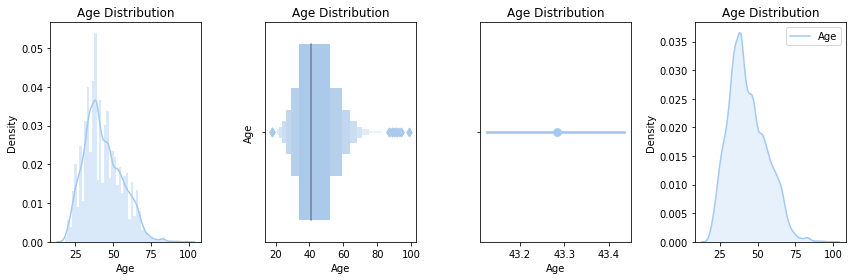

In [27]:
# Continous Distributions
f, ax = plt.subplots(1,4,figsize=(12,4), sharey=False)

# histogram with kde 
sns.distplot(cust_reviews.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")

# boxenplot 
sns.boxenplot(cust_reviews.Age, ax=ax[1])
ax[1].set_title("Age Distribution")
ax[1].set_ylabel("Age")

# pointplot 
sns.pointplot(cust_reviews.Age, ax=ax[2])
ax[2].set_title("Age Distribution")
plt.tight_layout()

# kde plot 
sns.kdeplot(cust_reviews.Age, shade=True, ax=ax[3])
ax[3].set_title("Age Distribution")
ax[3].set_ylabel("Density")
plt.tight_layout()
plt.show()

### Pros and Cons 
- _histogram with kde_: This is the best plot to use when dealing with a continous variable. With this plot, you are able to determine the distribution of the continous variable and its density. However, you are unable to determine the exact median of the variable (you can guess). 
- _boxen plot_: This is great for determining the median, the 75% - 25% values and to see if there are any outliers in your data. However, you will not be able to determine the distribution of the variable. 
- _pointplot_: This is great for categorical variables, to compare values/counts. This should not be used when plotting a continuous univariate variable. 
- _kde_: Similar to histgram plot. 

## Choose two continuous variables, and plot them three different ways.

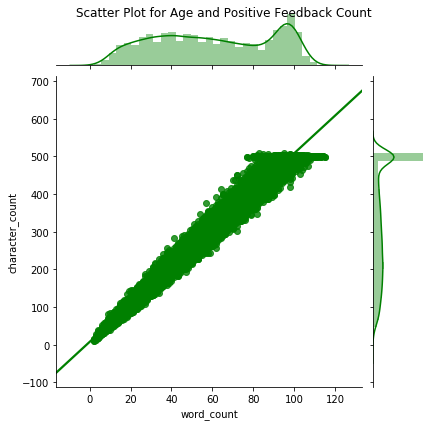

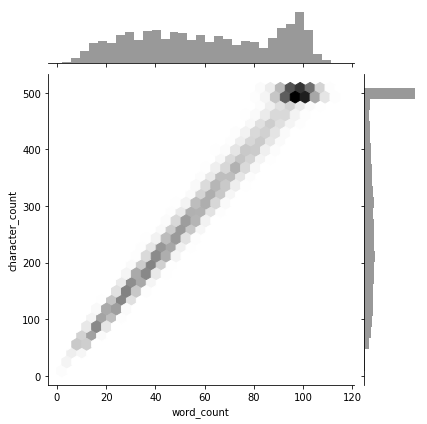

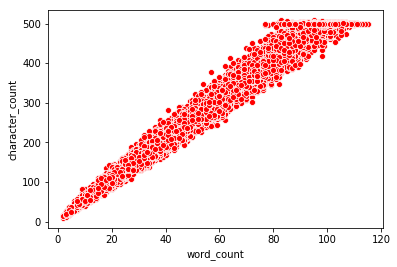

In [98]:
# scatterplot - reg
g = sns.jointplot(x=cust_reviews.word_count, y=cust_reviews.character_count, kind='reg', color='g')
g.fig.suptitle("Scatter Plot for Age and Positive Feedback Count")
plt.show()

# scatterplot - hex
sns.jointplot(x=cust_reviews.word_count, y=cust_reviews.character_count, kind="hex", color="k");
plt.show()

# scatterplot 
sns.scatterplot(x=cust_reviews.word_count, y=cust_reviews.character_count, color="r");
plt.show()

### Pros and Cons 
- _scatterplot - reg_: Great plot to see the correlation of two variables and their distributions respectively. Only con is that you are unable to see where character_count and word_count correlate the strongest. 

- _scatterplot - hex_: Great plot to see how two variables correlate and where they correlate the strongest. However, it does not provide the kde for each variable distribution. 

- _scatterplot: Basic plot to see how two variables correlate, probably the best graph to show to a technically challenge audience. However, it does not show the  



## Choose one continuous variable and one categorical variable, and plot them six different ways.

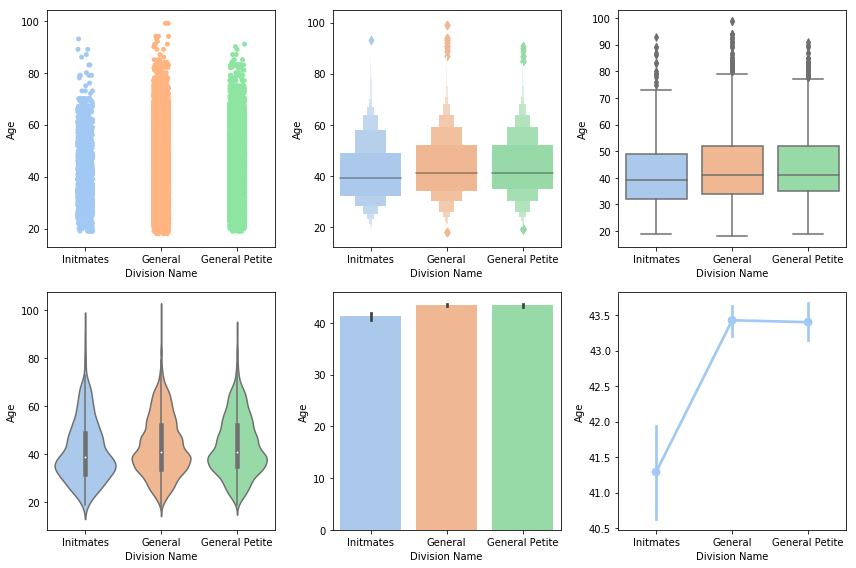

In [76]:
f, ax = plt.subplots(2, 3, figsize=(12,8), sharey=False )

# strip plot 
sns.stripplot(y = "Age", x = "Division Name", data=cust_reviews, ax=ax[0,0])

# boxen plot 
sns.boxenplot(y = "Age", x = "Division Name", data=cust_reviews,ax=ax[0,1])

# box plot 
sns.boxplot(y = "Age", x = "Division Name", data=cust_reviews,ax=ax[0,2])

# violin plot 
sns.violinplot(y = "Age", x = "Division Name", data=cust_reviews, ax=ax[1,0])

# bar plot 
sns.barplot(y = "Age", x = "Division Name", data=cust_reviews,ax=ax[1,1])

# Point plot 
sns.pointplot(y = "Age", x = "Division Name", data=cust_reviews, ax=ax[1,2])

plt.tight_layout()
plt.show()

### Pros and Cons: 

- _strip plot_: This is not the best plot to use. However, you are able to get a gauge for the density of age within each division. 
- _boxen plot_: Great plot to compare central tendencies between each division. However, this is not good for comparing distributions. 
- _box plot_: Great plot to compare central tendenencies between each division. However, this is not good for comparing distributions. 
- _violin plot_: Great for comparing distibutions. Not good for comparing central tendencies. 
- _bar plot_: Not a great plot to use. 
- _point plot_: Great for comparing averages. 

# Challenge

As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups

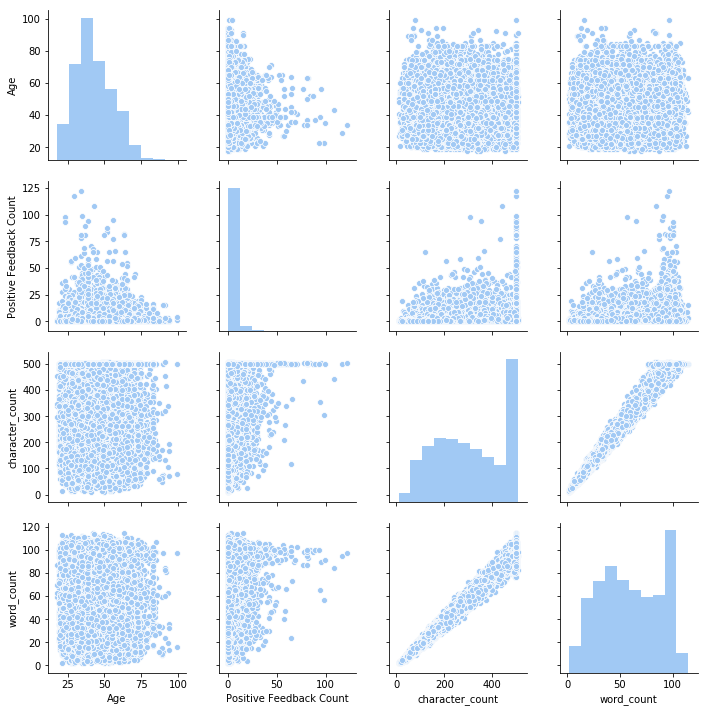

In [85]:
sns.pairplot(cust_reviews[['Age','Positive Feedback Count','character_count', 'word_count', "Division Name"]])
plt.show()

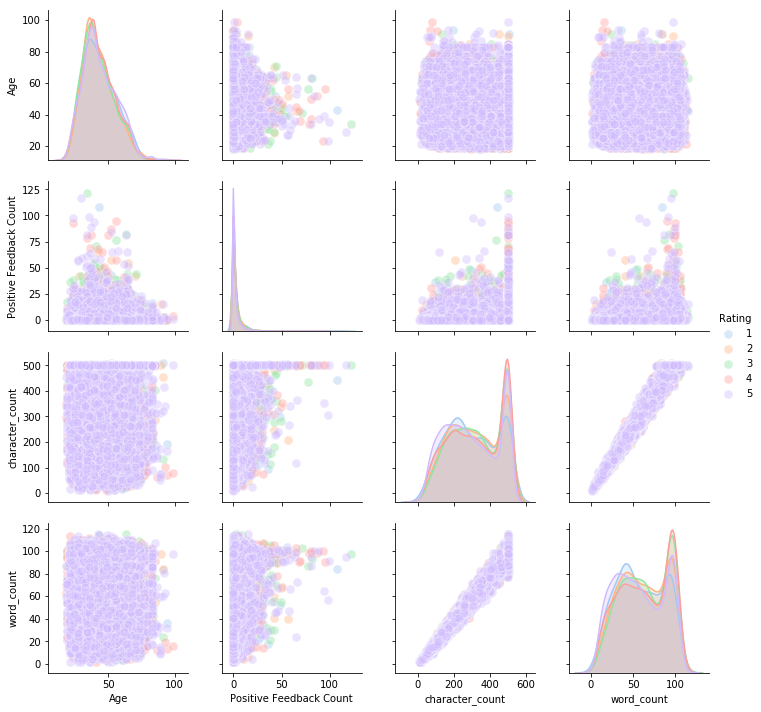

In [96]:
sns.pairplot(cust_reviews, vars=['Age','Positive Feedback Count','character_count', 'word_count'], hue="Rating",
             plot_kws = {'alpha': 0.4, 's': 80})
plt.show()

## Quick observation: 
 
- The majority of the reviews are between the ages of 35-45 (guess)
- There is a correlation between character_count and word_count 
- There is a correlation between Positive Feedback Count and character_count/word_count
- Positive Feedback Count has a distribution similar to Pareto's Distribution/Law 
- Long reviews (by character/word_count) are more common than short reviews. 